<a href="https://colab.research.google.com/github/K1EH/GCU_MachineLearning/blob/main/1_3_BreamAndSmelt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 마켓과 머신러닝

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/1-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 생선 분류 문제

### 도미 데이터 준비하기

In [1]:
# 생선의 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
# 생선의 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

각 도미의 특징을 길이와 무게로 표시한 것 -> feature

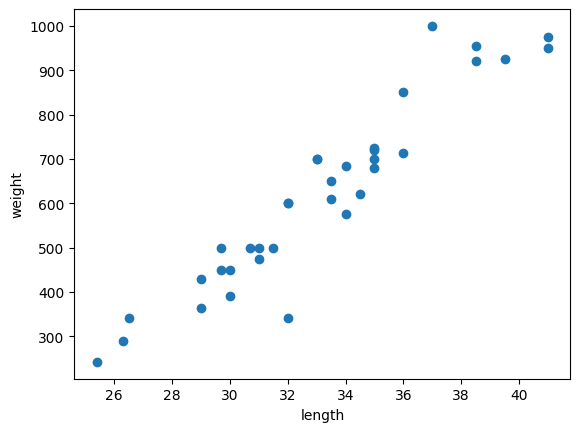

In [2]:
import matplotlib.pyplot as plt # matplotlib의 pylot함수를 plt로 줄여서 사용

plt.scatter(bream_length, bream_weight) # scatter plot - 산점도 :x, y 의 관계를 그래프에 점으로 표시
plt.xlabel('length') # x축은 무게
plt.ylabel('weight') # y축은 길이
plt.show()

생선의 길이가 길 수록 무게가 많이 나감 -> **선형(linear)**적임

### 빙어 데이터 준비하기

In [3]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

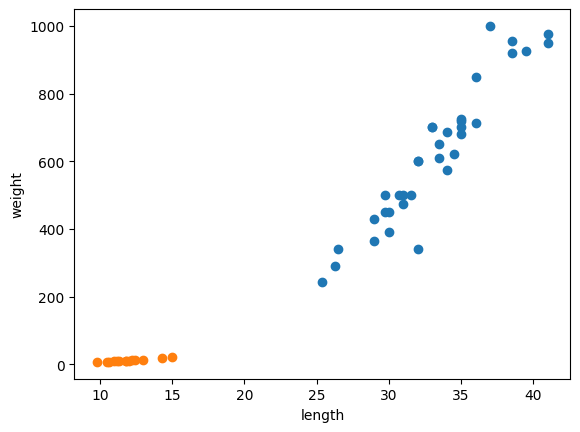

In [4]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

도미에 비해 빙어는 무게가 길이에 영향을 덜 받는다

## 첫 번째 머신러닝 프로그램

In [6]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

도미 35마리, 빙어 14마리의 길이와 무게 리스트를 합침

In [7]:
fish_data = [[l, w] for l, w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


사이킷런[scikit-learn]은 머신러닝 패키지이며, 2차원 리스트가 필요함



```
# 49개의 생선에 대한 ~*이탤릭체 텍스트*
#  길이  무게
[ [25.4, 242.0],
  [26.3, 290.0],
  ...
  [15.0, 19.9]]
```


zip() 함수를 이용해 나열된 리스트 각각에서 원소를 하나씩 꺼내 반환함


In [14]:
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


1은 도미, 0은 빙어를 의미함
보통 머신러닝에서 2개를 구분하는 경우, 찾으려는 대상을 1로, 그 외의 대상을 0으로 놓음

In [15]:
from sklearn.neighbors import KNeighborsClassifier # K-NN 알고리즘을 구현한 클래스인 KNeighborsClassifier을 import

In [16]:
kn = KNeighborsClassifier() # KNeighborsClassifier 클래스의 객체를 만듦

In [17]:
kn.fit(fish_data, fish_target) # fit()메서드를 이용해 훈련[training]시킴

KNeighborsClassifier()

In [19]:
kn.score(fish_data, fish_target) # score() : 모델을 평가하는 메서드, 0과 1사이의 값 반환

1.0

### k-최근접 이웃 알고리즘

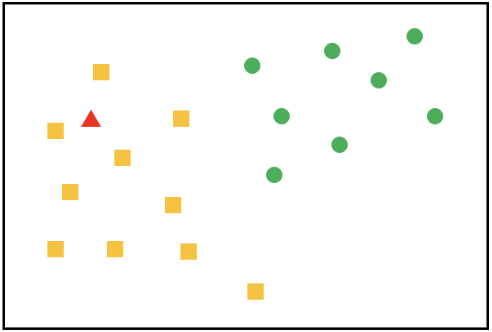

[[머신러닝] K-최근접 이웃(K-NN) 알고리즘 및 실습](https://rebro.kr/183)

**K-NN 알고리즘** : 주변의 가장 가까운 K개의 데이터를 보고 데이터가 속할 그룹을 판단하는 알고리즘
- 단순히 훈련 데이터셋을 저장하는 것이 모델을 만드는 과정 전부임
- 거리를 측정할 때 유클리드 거리를 사용
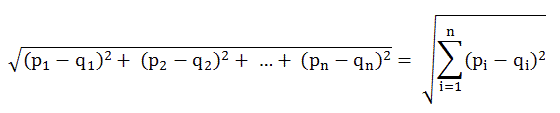

[Euclidean Distance (유클리디안 거리)](https://abum.tistory.com/entry/Euclidean-Distance-%EC%9C%A0%ED%81%B4%EB%A6%AC%EB%94%94%EC%95%88-%EA%B1%B0%EB%A6%AC)

- K값에 따라 분류가 달라질 수 있음

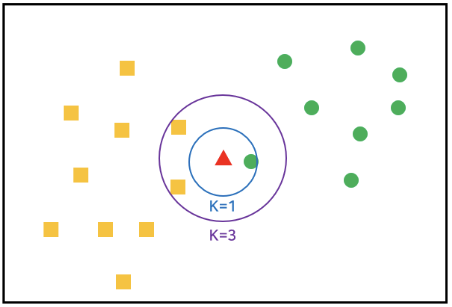

( K가 1인 경우 : 초록색 그룹, K가 3인 경우 : 노랑색 그룹 )
- 항상 분류가 가능하도록, K는 홀수로 설정하는 것이 좋음
- 최선의 K는 일반적으로 총 데이터 수의 제곱근 값

--- 장점 ---
- 다른 알고리즘에 비해 단순해, 구현하기 쉽다
- 훈련 단계가 매우 빠르다

--- 단점 ---
- 모델을 생성하지 않기 때문에, 특징과 클래스 간 관계를 이해하는데 제한적이다
- 적절한 K의 선택이 필요하다
- 데이터가 많아지면, 분류 단계가 느리다

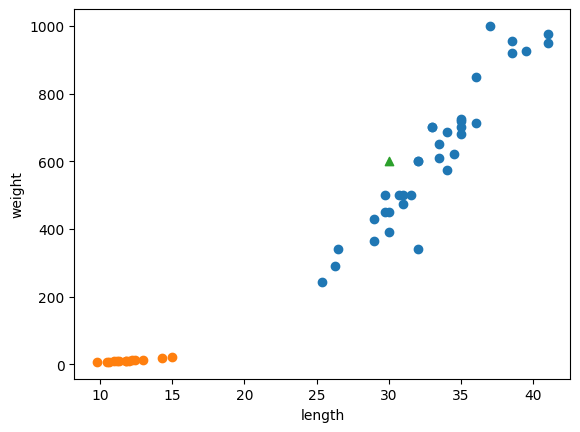

In [21]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^') # 이 삼각형이 도미인지 빙어인지 예측
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [22]:
kn.predict([[30, 600]])

array([1])

반환값 1 은 도미를 의미

In [24]:
# kn객체는 _fit_X 속성에 fish_data를 모두 가지고 있음
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [25]:
# kn객체는 _y속성에 fish_target을 가지고 있음
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [26]:
# 가장 가까운 데이터 49개를 사용하는 K-NN모델 (기본 값은 5임)
kn49 = KNeighborsClassifier(n_neighbors=49)

In [ ]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [27]:
print(35/49)

0.7142857142857143


49마리의 생선 데이터 중, 도미가 35개로 다수를 차지함. 즉, 어떤 데이터를 넣어도 도미로 예측함

### 확인 문제

In [ ]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
    # 최근접 이웃 개수 설정
    kn.n_neighbors = n
    # 점수 계산
    score = kn.score(fish_data, fish_target)
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n, score)
        break

18 0.9795918367346939
